In [22]:
# Install Libraries
!pip install textblob
!pip install tweepy

In [23]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
# Authentication
consumerKey = "SOWAJvTQnEhhvIeDEIe5Zg1LI"
consumerSecret = "Trg4PRbKj3DqqGzx3nVYCjFCPKiUA26Drt2EZ91iMBTIvhw1rL"
accessToken = "988689869907152896-5QsqBdFYdQkuZ5915zEw0qecg7MgFJ3"
accessTokenSecret = "9DbgUmLCN8g8ywdeauFMNmSMeuOJbMDhuxPAg94v85uh0"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [29]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [30]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  131
positive number:  67
negative number:  30
neutral number:  34


In [31]:
tweet_list

,0
0,GOD I MISS U SO MUCG https://t.co/pdBzX3Znyg
1,KINAKABAHAN AKO SO MUCG
2,@dreamskiller88 @BabyDogeCoin @babydogeburn_ @...
3,@was_unhinged THATS TOO MUCG BUT YEAHHH
4,@Woodsey10251941 He won't care in slightest. S...
...,...
126,I LOV YHEM SO MUCG https://t.co/KT95z0jX2s
127,RT @sersyamarie_: @SB_Senyora19 @SB19Official ...
128,RT @sersyamarie_: @SB_Senyora19 @SB19Official ...
129,RT @sersyamarie_: @SB_Senyora19 @SB19Official ...


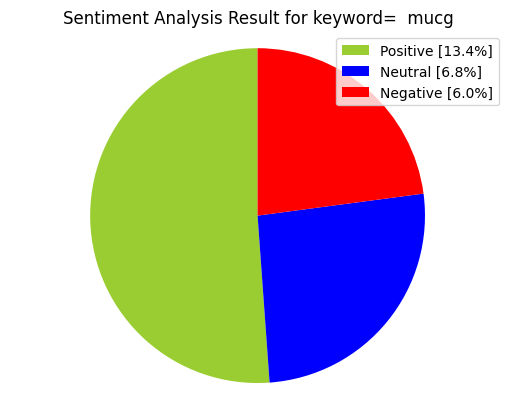

In [32]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [33]:
tweet_list.drop_duplicates(inplace = True)


In [34]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,GOD I MISS U SO MUCG https://t.co/pdBzX3Znyg,GOD I MISS U SO MUCG https://t.co/pdBzX3Znyg
1,KINAKABAHAN AKO SO MUCG,KINAKABAHAN AKO SO MUCG
2,@dreamskiller88 @BabyDogeCoin @babydogeburn_ @...,@dreamskiller88 @BabyDogeCoin @babydogeburn_ @...
3,@was_unhinged THATS TOO MUCG BUT YEAHHH,@was_unhinged THATS TOO MUCG BUT YEAHHH
4,@Woodsey10251941 He won't care in slightest. S...,@Woodsey10251941 He won't care in slightest. S...
...,...,...
121,i love them so mucg:(((,i love them so mucg:(((
122,@otbhabitss No my irls they're being too mucg,@otbhabitss No my irls they're being too mucg
123,I LOVE HIM SO MUCG https://t.co/wr6U9zsO9m,I LOVE HIM SO MUCG https://t.co/wr6U9zsO9m
124,@ScrambledFaz Not mucg after that P5 casino ga...,@ScrambledFaz Not mucg after that P5 casino ga...


In [35]:
tweet_list

,0,text
0,GOD I MISS U SO MUCG https://t.co/pdBzX3Znyg,GOD I MISS U SO MUCG https://t.co/pdBzX3Znyg
1,KINAKABAHAN AKO SO MUCG,KINAKABAHAN AKO SO MUCG
2,@dreamskiller88 @BabyDogeCoin @babydogeburn_ @...,@dreamskiller88 @BabyDogeCoin @babydogeburn_ @...
3,@was_unhinged THATS TOO MUCG BUT YEAHHH,@was_unhinged THATS TOO MUCG BUT YEAHHH
4,@Woodsey10251941 He won't care in slightest. S...,@Woodsey10251941 He won't care in slightest. S...
...,...,...
121,i love them so mucg:(((,i love them so mucg:(((
122,@otbhabitss No my irls they're being too mucg,@otbhabitss No my irls they're being too mucg
123,I LOVE HIM SO MUCG https://t.co/wr6U9zsO9m,I LOVE HIM SO MUCG https://t.co/wr6U9zsO9m
124,@ScrambledFaz Not mucg after that P5 casino ga...,@ScrambledFaz Not mucg after that P5 casino ga...


In [36]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,GOD I MISS U SO MUCG https://t.co/pdBzX3Znyg,god i miss u so mucg
1,KINAKABAHAN AKO SO MUCG,kinakabahan ako so mucg
2,@dreamskiller88 @BabyDogeCoin @babydogeburn_ @...,binance killing 2 zeroes is eno
3,@was_unhinged THATS TOO MUCG BUT YEAHHH,unhinged thats too mucg but yeahhh
4,@Woodsey10251941 He won't care in slightest. S...,he won t care in slightest still gets play ...
5,ME@TOP BUT LIKE SO MUCG https://t.co/jE5dLQOxiV,me but like so mucg
6,@jes_chastain HAIWJAKAJFJKESNNE I LOVE YOU SO ...,chastain haiwjakajfjkesnne i love you so mucg
7,Congratulations ti the students and entire me...,congratulations ti the students and entire me...
8,oh he loves stays so mucg 🥹 https://t.co/mxtCW...,oh he loves stays so mucg
9,I have always been in love with their adorable...,i have always been in love with their adorable...


In [37]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,GOD I MISS U SO MUCG https://t.co/pdBzX3Znyg,god i miss u so mucg,0.000000,0.000000,positive,0.281,0.351,0.368,0.1280
1,KINAKABAHAN AKO SO MUCG,kinakabahan ako so mucg,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,@dreamskiller88 @BabyDogeCoin @babydogeburn_ @...,binance killing 2 zeroes is eno,0.000000,0.000000,negative,0.524,0.476,0.000,-0.6597
3,@was_unhinged THATS TOO MUCG BUT YEAHHH,unhinged thats too mucg but yeahhh,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,@Woodsey10251941 He won't care in slightest. S...,he won t care in slightest still gets play ...,0.183333,0.388889,positive,0.000,0.564,0.436,0.9029
5,ME@TOP BUT LIKE SO MUCG https://t.co/jE5dLQOxiV,me but like so mucg,0.000000,0.000000,positive,0.000,0.552,0.448,0.5023
6,@jes_chastain HAIWJAKAJFJKESNNE I LOVE YOU SO ...,chastain haiwjakajfjkesnne i love you so mucg,0.500000,0.600000,positive,0.000,0.543,0.457,0.6369
7,Congratulations ti the students and entire me...,congratulations ti the students and entire me...,0.250000,0.481250,positive,0.000,0.580,0.420,0.8974
8,oh he loves stays so mucg 🥹 https://t.co/mxtCW...,oh he loves stays so mucg,0.000000,0.000000,positive,0.000,0.575,0.425,0.5719
9,I have always been in love with their adorable...,i have always been in love with their adorable...,0.500000,0.800000,positive,0.000,0.742,0.258,0.6428


In [38]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [39]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [40]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,62,51.24
negative,31,25.62
neutral,28,23.14


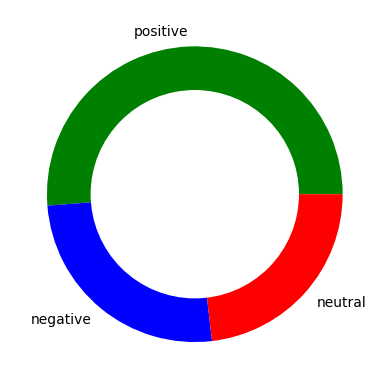

In [41]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [42]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


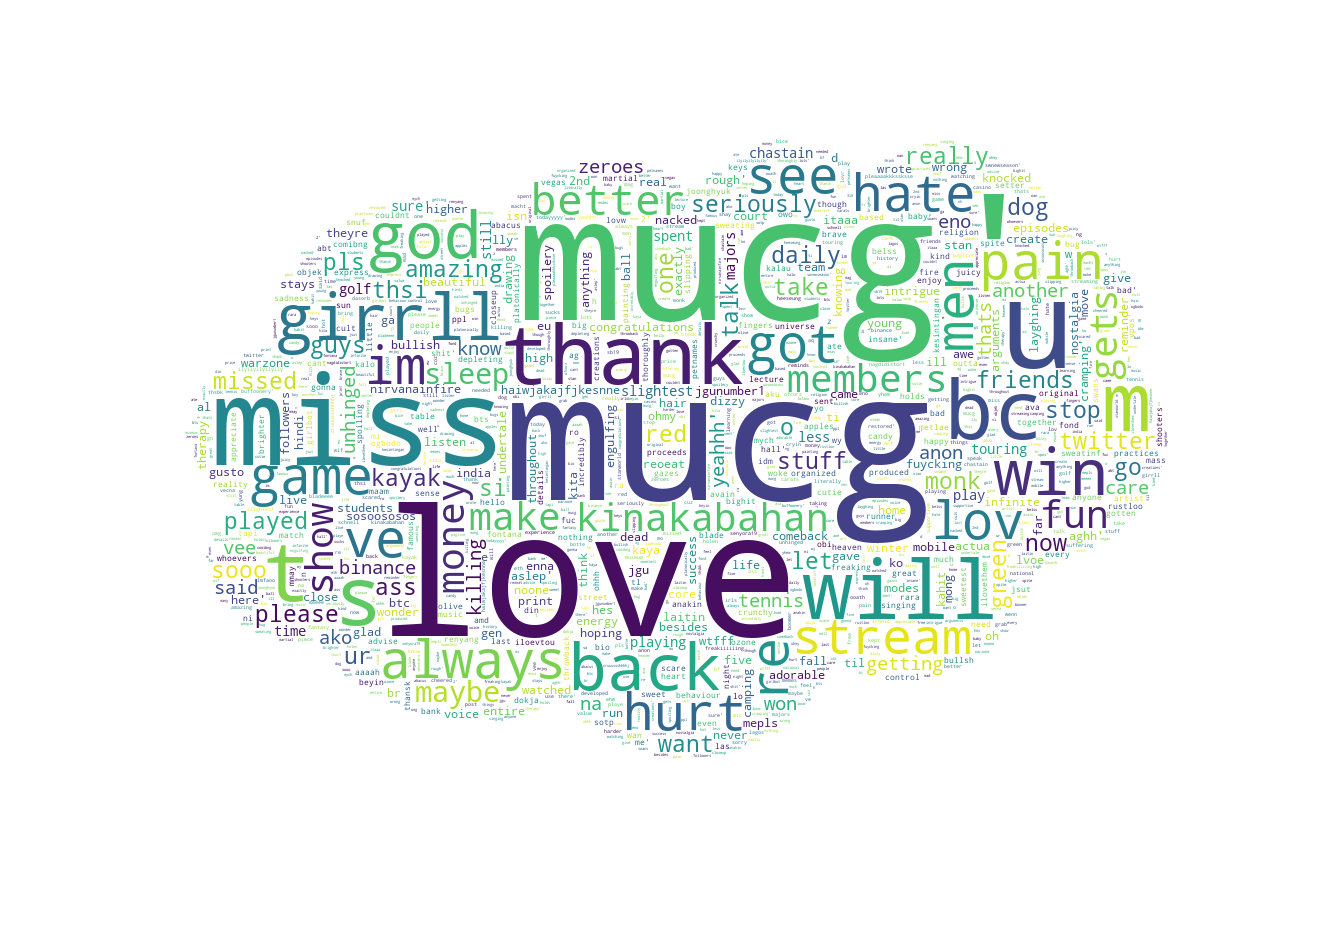

In [43]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


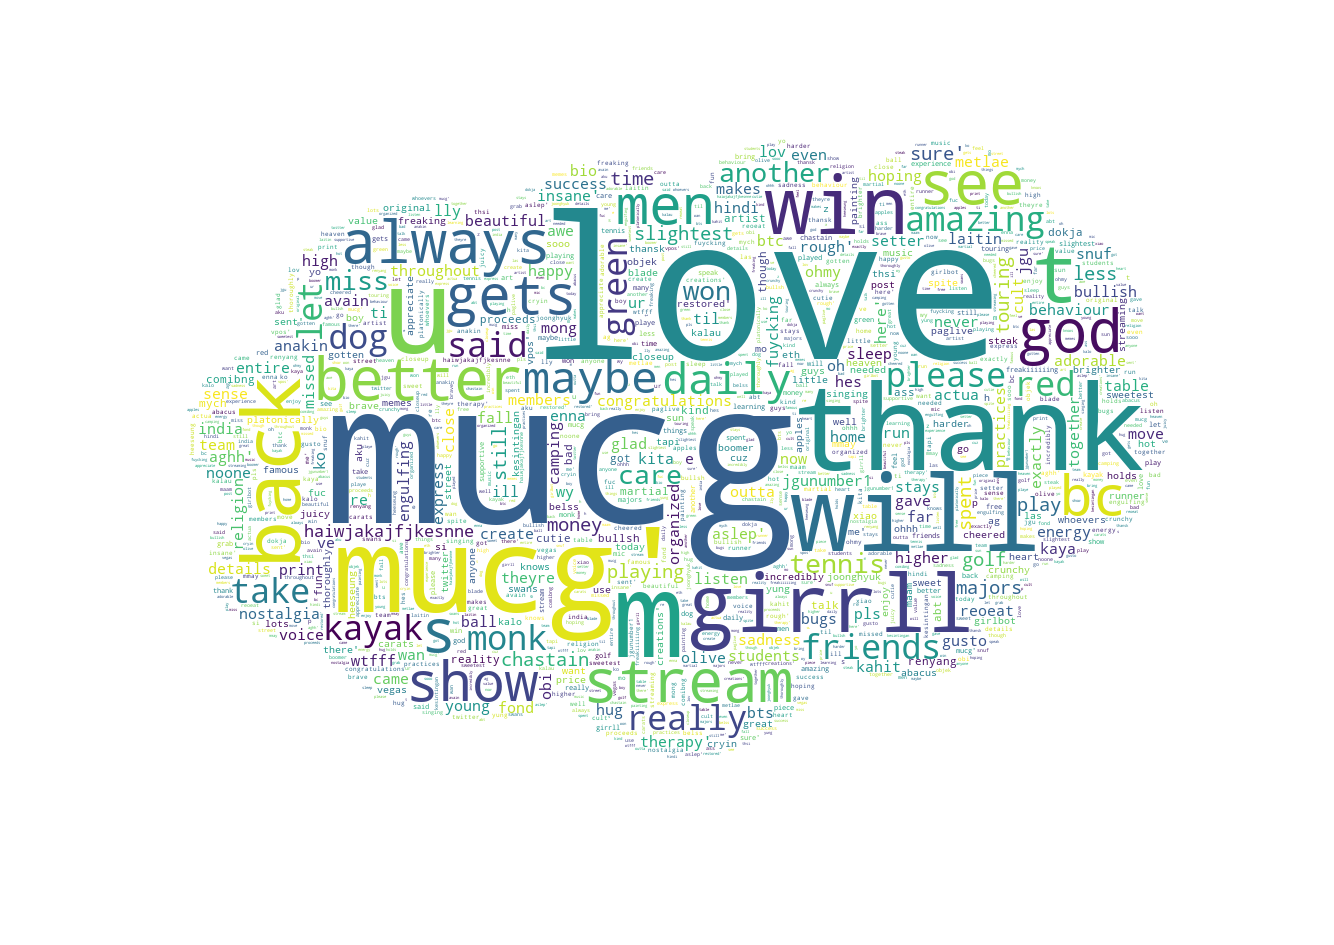

In [44]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


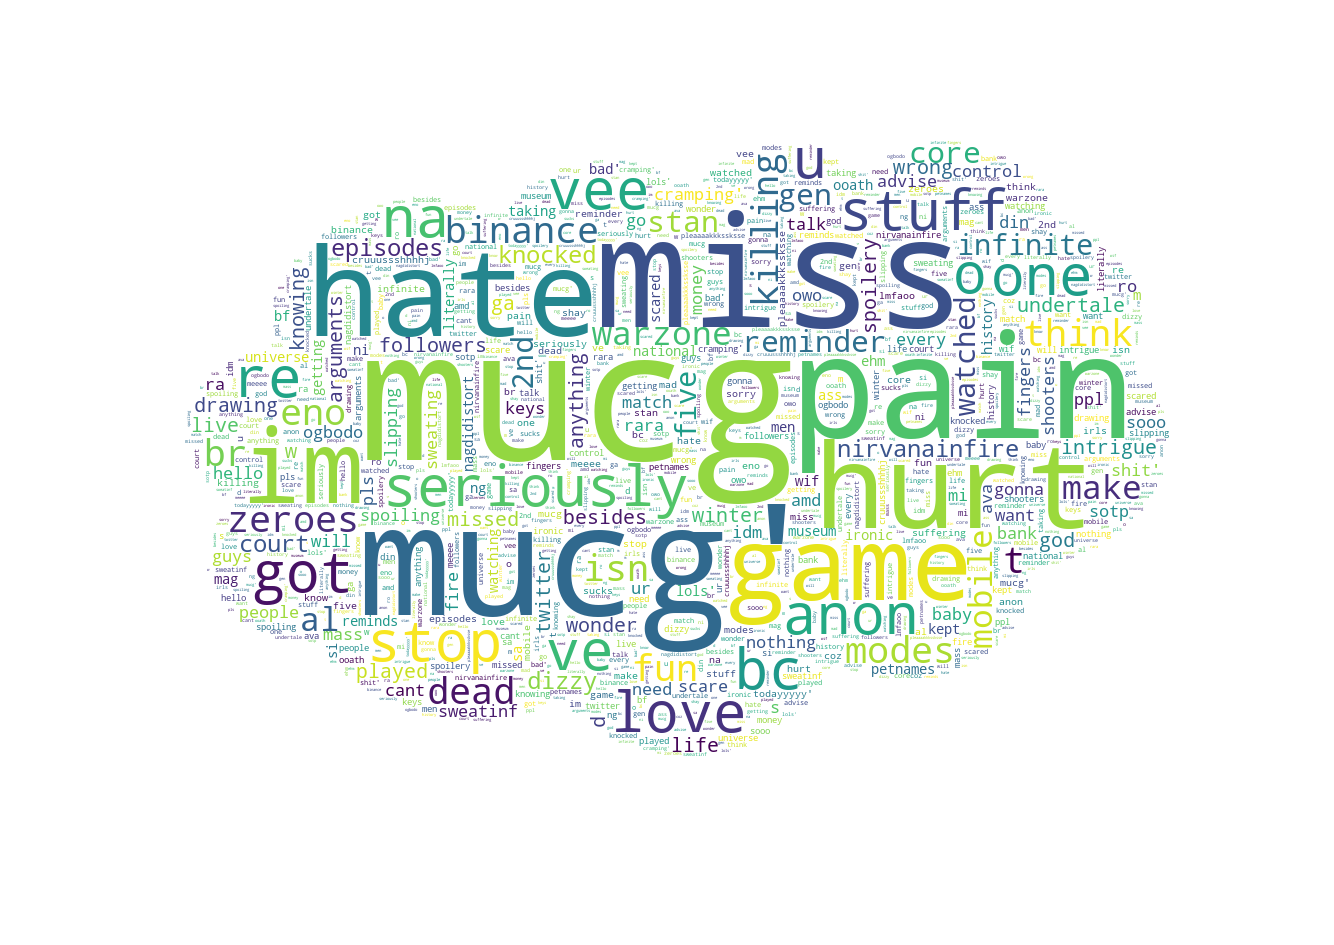

In [45]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


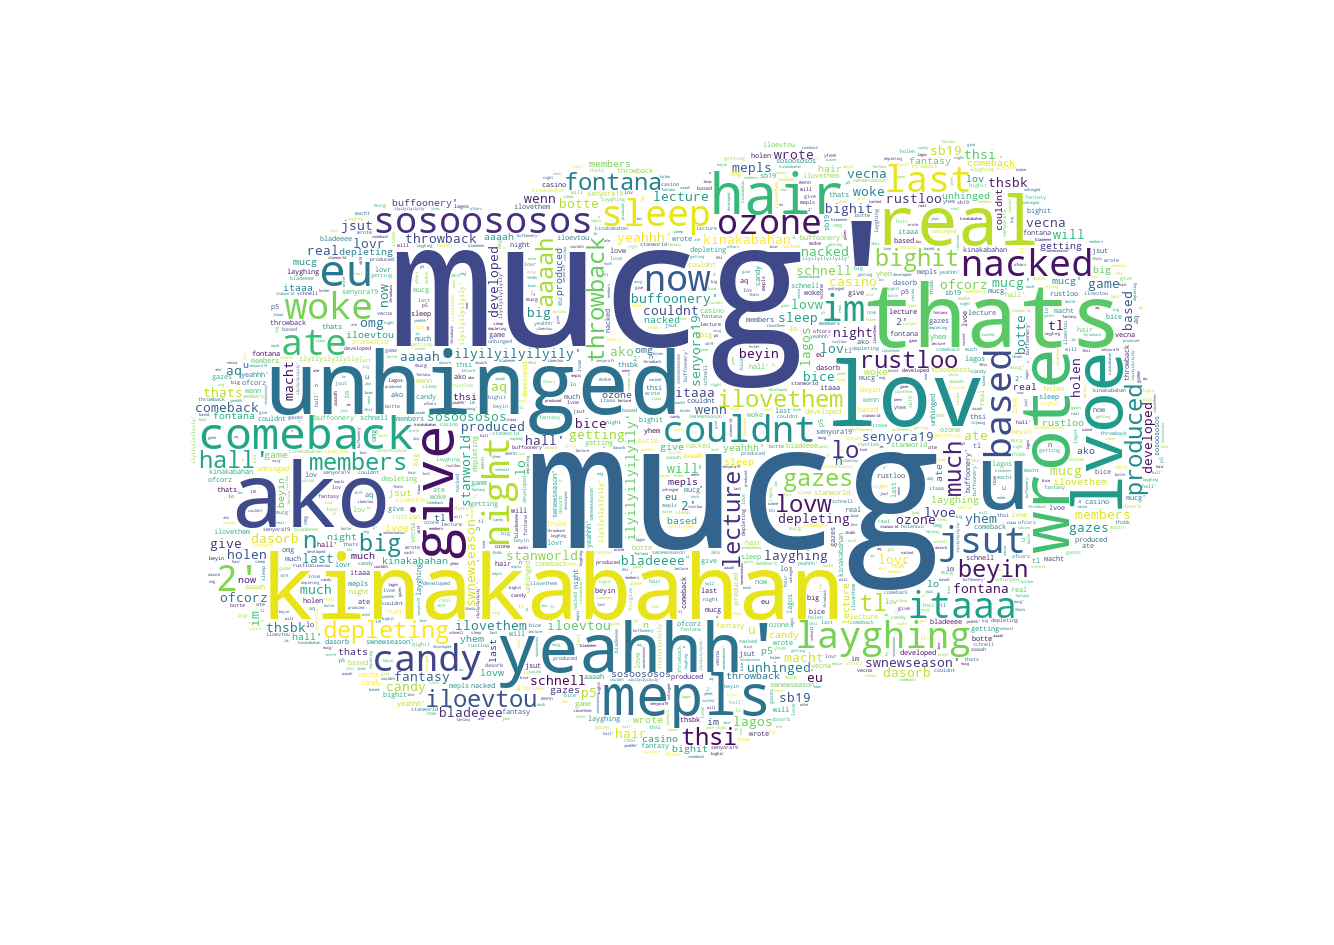

In [46]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [47]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [48]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)


,text_len
sentiment,
negative,63.45
neutral,40.82
positive,64.23


In [49]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)


,text_word_count
sentiment,
negative,12.87
neutral,7.61
positive,12.84


In [50]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [51]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [52]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [53]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [54]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [55]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,GOD I MISS U SO MUCG https://t.co/pdBzX3Znyg,god i miss u so mucg,0.000000,0.000000,positive,0.281,0.351,0.368,0.1280,22,6,god i miss u so mucg,"[god, i, miss, u, so, mucg, ]","[god, miss, u, mucg, ]","[god, miss, u, mucg, ]"
1,KINAKABAHAN AKO SO MUCG,kinakabahan ako so mucg,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,23,4,kinakabahan ako so mucg,"[kinakabahan, ako, so, mucg]","[kinakabahan, ako, mucg]","[kinakabahan, ako, mucg]"
2,@dreamskiller88 @BabyDogeCoin @babydogeburn_ @...,binance killing 2 zeroes is eno,0.000000,0.000000,negative,0.524,0.476,0.000,-0.6597,49,6,binance killing zeroes is eno,"[, binance, killing, zeroes, is, eno, ]","[, binance, killing, zeroes, eno, ]","[, binanc, kill, zero, eno, ]"
3,@was_unhinged THATS TOO MUCG BUT YEAHHH,unhinged thats too mucg but yeahhh,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,36,6,unhinged thats too mucg but yeahhh,"[, unhinged, thats, too, mucg, but, yeahhh]","[, unhinged, thats, mucg, yeahhh]","[, unhing, that, mucg, yeahhh]"
4,@Woodsey10251941 He won't care in slightest. S...,he won t care in slightest still gets play ...,0.183333,0.388889,positive,0.000,0.564,0.436,0.9029,123,23,he won t care in slightest still gets play ...,"[, he, won, t, care, in, slightest, still, get...","[, care, slightest, still, gets, play, majors,...","[, care, slightest, still, get, play, major, m..."


In [56]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

121 Number of reviews has 465 words


In [57]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

c:\Users\ROBERT LAWSON\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,aaaah,abacu,abt,actua,ador,advis,ag,aghh,ako,...,wtfff,wy,xiao,yeahhh,yhem,yo,young,yung,z,zero
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
mucg,133
love,35
miss,10
u,8
thank,7
like,6
get,5
play,5
r,5
back,4


In [59]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [60]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('mucg mucg', 21),
 ('love mucg', 18),
 ('miss mucg', 6),
 ('thank mucg', 4),
 ('mucg love', 4),
 ('mucg better', 3),
 ('love men', 2),
 ('missed mucg', 2),
 ('hate mucg', 2),
 ('men mucg', 2),
 ('sooo mucg', 2),
 ('girrll girrll', 2),
 ('girrll said', 2),
 ('said did', 2),
 ('did win', 2),
 ('win tennis', 2),
 ('tennis wins', 2),
 ('god miss', 1),
 ('kinakabahan ako', 1),
 ('ako mucg', 1)]

In [61]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('mucg mucg mucg', 19),
 ('girrll girrll said', 2),
 ('girrll said did', 2),
 ('said did win', 2),
 ('did win tennis', 2),
 ('win tennis wins', 2),
 ('god miss mucg', 1),
 ('kinakabahan ako mucg', 1),
 ('binance killing zeroes', 1),
 ('killing zeroes eno', 1),
 ('unhinged thats mucg', 1),
 ('thats mucg yeahhh', 1),
 ('won care slightest', 1),
 ('care slightest gets', 1),
 ('slightest gets play', 1),
 ('gets play majors', 1),
 ('play majors mucg', 1),
 ('majors mucg money', 1),
 ('mucg money time', 1),
 ('money time spent', 1)]